In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
data.shape

(398, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
data[data["horsepower"]=="?"].shape

(6, 9)

In [9]:
data = data[data.horsepower != '?']

In [10]:
print('?' in data.horsepower)

False


In [11]:
data.shape

(392, 9)

In [12]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [13]:
data.horsepower = data.horsepower.astype('float')


In [14]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#### As the all the features are in a proper datatype as they should be we can proceed for further analysis

In [15]:
# first we should look at all the numeric features.
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

C:\Users\Dell\Anaconda3\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


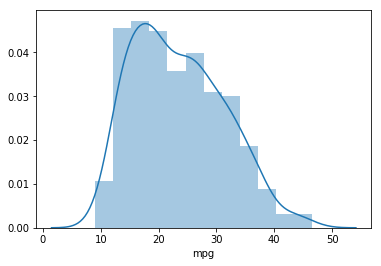

In [17]:
sns.distplot(data['mpg'])

In [18]:
from sklearn import preprocessing

In [19]:
data_scale = data.copy()

In [20]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [21]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [22]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino


In [23]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [24]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu,USA
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320,USA
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite,USA
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst,USA
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino,USA


#### So we have scaled the data down to values between 0 and 1 and changed the country code to USA Europe and Japan.

# EDA

## Bi-Variate Analysis

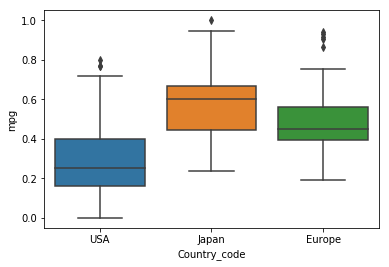

In [25]:
# Box Plot between mpg and country code
sns.boxplot(x = 'Country_code',y = 'mpg', data = data_scale)

* So by this graph it can be concluded that cars in japan have higher average mpg compared to Europe and USA.
* Frrom the graph max number of ouliers lie int he region of Europe and the least in japan
* USA has the least average mpg.

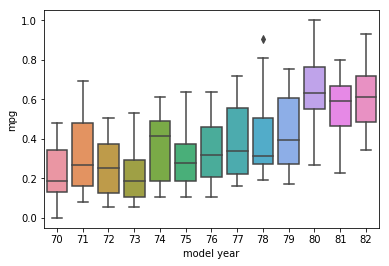

In [26]:
# Box Plot between mpg and model year of the car
sns.boxplot(x = 'model year',y = 'mpg', data = data_scale)

* The cars from model year 80 have highest average mpg.
* The lowest average mpg can be seem from the crs whose model year was 70


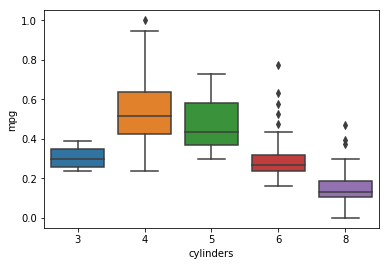

In [27]:
# Box Plot between mpg and number of cylinder of the car
sns.boxplot(x = 'cylinders',y = 'mpg', data = data_scale)

* As expected the cars with 4 cylinder have the best average mpg.
* As the number of cylinder in creases the average mpg decreases.
* The average mpg of cars with 3 cylinder engine is very simmilar to cars with 6 cylinder engine.

In [28]:
data.describe(include= 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota corolla,USA
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,245
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN,NaN


* So by this we can get a hold of all the minimum and maximum values present in the data.
* There doesn't seem to be ny extreme outlier that needs to be removed.

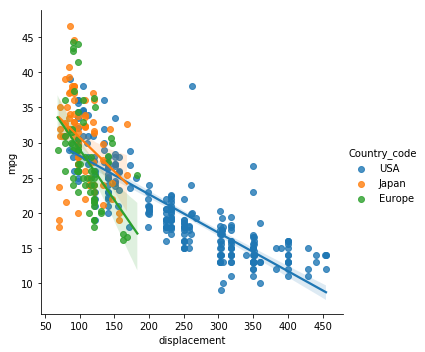

In [29]:
# Now ploting the categorical features using lmplot() to see which features are the most useful 
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set()

* Many of the blue points are seperable based on the mpg-displacement graph.

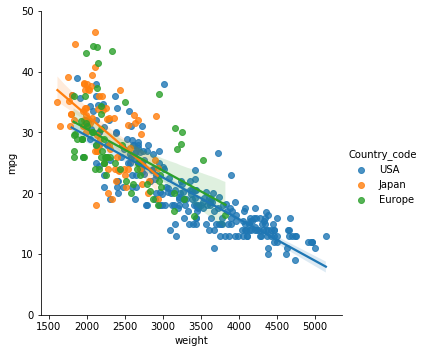

In [30]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

In [31]:
data['Power_to_weight'] = ((data.horsepower*0.7457)/data.weight)

* This cocludes the data visvalisation part now model making can be done.

# Spliting The Dataset

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code,Power_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA,0.027666
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA,0.033317
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA,0.032554
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA,0.032582
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA,0.030269


In [34]:
Y = data.mpg
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year','Power_to_weight']
X = pd.DataFrame(data[factors].copy())

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.head()

,cylinders,displacement,horsepower,acceleration,weight,origin,model year,Power_to_weight
159,8,351.0,148.0,13.5,4657,1,75,0.023698
249,8,260.0,110.0,15.5,3365,1,78,0.024377
350,4,105.0,63.0,14.9,2215,1,81,0.021210
256,6,225.0,100.0,17.2,3430,1,78,0.021741
355,4,107.0,75.0,14.4,2210,3,81,0.025307


In [36]:
X_train.shape

(313, 8)

In [37]:
X_test.shape

(79, 8)

# Linear Rgression Model

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Coefficients: 
 [-2.60645512e-01  1.09033366e-02  1.77172522e-01 -2.84135565e-02
 -1.28706853e-02  1.56372720e+00  6.96588358e-01 -9.42682880e+02]
Variance score: 0.8505168479276458


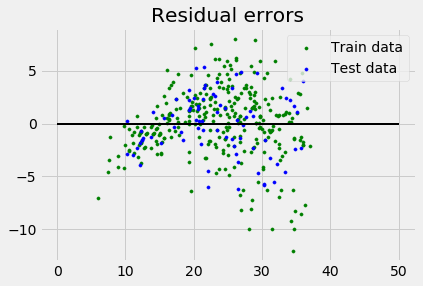

In [46]:
# create linear regression object 
reg = LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, Y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, Y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [47]:
y_predicted = reg.predict(X_test)

In [48]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=Y_test,y_pred=y_predicted))
rmse

2.8816396895658074

# Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [50]:
gb_regressor = GradientBoostingRegressor(n_estimators=300,max_depth=3)
gb_regressor.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=300)

In [51]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [52]:
rmse_bgr = sqrt(mean_squared_error(y_true=Y_test,y_pred=y_predicted_gbr))
rmse_bgr


2.383552637570386

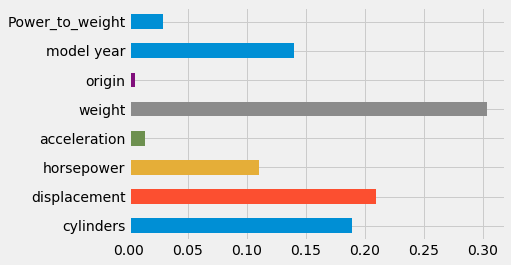

In [53]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

# Conclusion 
* As we can see that Gradient Boosting was a better model asa it has lower root meana squared error.
* The RMSE error I got was 2.38
* "Weight" feature was the most important feature in the whole dataset.
* The custom feature made (power_to_weight) also added more value than some of the features that were alrady present in the dataset.

Reference taken from : "https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg/notebook"